In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
# importing the dataset
dataset=pd.read_csv("data.csv",index_col="Date",parse_dates=True)

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-30,42120.0,42330.0,41700.0,41830.0,610000.0
2016-12-29,43000.0,43220.0,42540.0,42660.0,448400.0
2016-12-28,43940.0,43970.0,43270.0,43270.0,339900.0
2016-12-27,43140.0,43700.0,43140.0,43620.0,400100.0
2016-12-26,43310.0,43660.0,43090.0,43340.0,358200.0


In [ ]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226 entries, 2016-12-30 to 2012-04-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1226 non-null   float64
 1   High    1226 non-null   float64
 2   Low     1226 non-null   float64
 3   Close   1226 non-null   float64
 4   Volume  1226 non-null   float64
dtypes: float64(5)
memory usage: 57.5 KB


<AxesSubplot:xlabel='Date'>

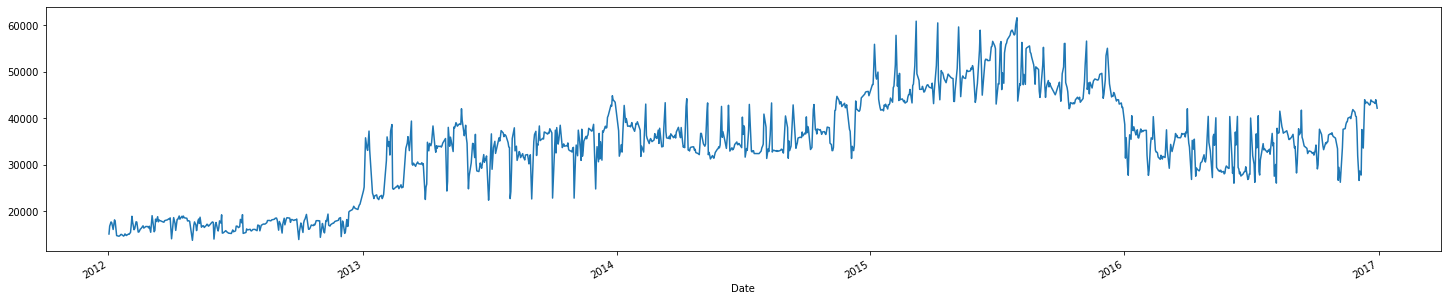

In [ ]:
dataset['Open'].plot(figsize=(25,5))

In [ ]:
#convert column "a" of a Dataframe
#dataset['Close'] = dataset['Close'].str.replace(',',' ').astype(float)


In [ ]:
#dataset["Volume"]=dataset["Volume"].str.replace(',','').astype(float)

In [ ]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-30,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN
2016-12-27,NaN,NaN,NaN,NaN,NaN
2016-12-26,NaN,NaN,NaN,NaN,NaN
2016-12-22,NaN,NaN,NaN,NaN,NaN
2016-12-21,43295.714286,43584.285714,42934.285714,43171.428571,456728.571429
2016-12-20,43408.571429,43770.000000,43100.000000,43427.142857,440928.571429
2016-12-19,43378.571429,43760.000000,43128.571429,43494.285714,428114.285714


<AxesSubplot:xlabel='Date'>

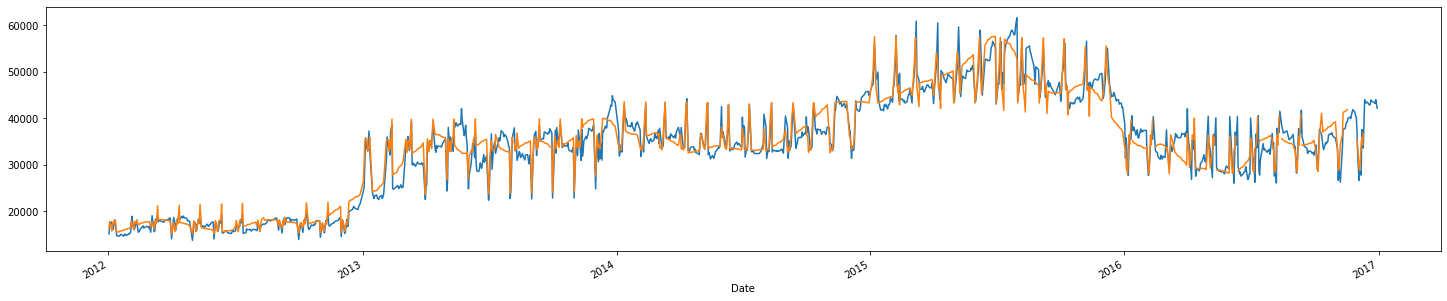

In [ ]:
#Visualization of Open and Close
dataset['Open'].plot(figsize=(25,5))
dataset.rolling(window=30).mean()['Close'].plot()

Text(0, 0.5, 'Stock Prices')

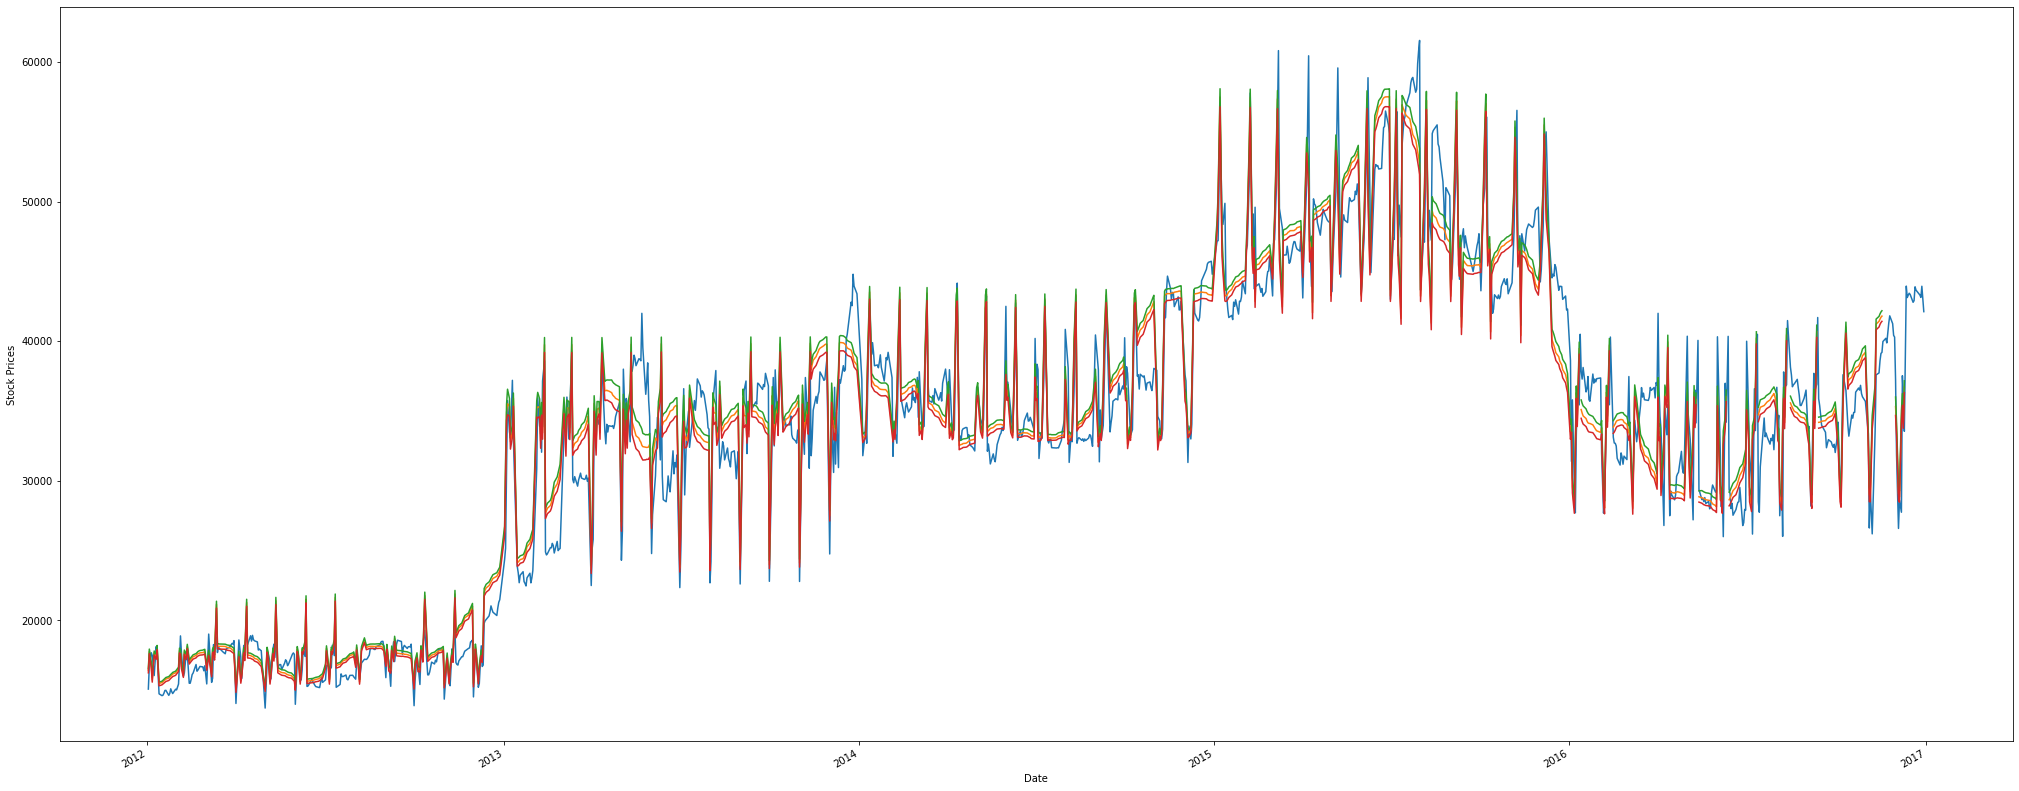

In [99]:
# Visualization in OHLC
dataset['Open'].plot(figsize=(35,15))
dataset.rolling(window=30).mean()['Close'].plot()
dataset.rolling(window=30).mean()['High'].plot()
dataset.rolling(window=30).mean()['Low'].plot()
plt.ylabel('Stock Prices')

In [100]:
#dataset['Close : 30 Day Mean '] =dataset['Close'].rolling(window=30).mean()
#dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [107]:
# Optional Specify a minimum number of periods
#dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(25,5))

In [102]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [103]:
#Data cleaning
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [104]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [105]:
# Crearting a datastructure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1225):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train),np.array(y_train)
# Reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [106]:
# PART 2 -Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

ImportError: Traceback (most recent call last):
  File "C:\Users\INCHARA SM\AppData\Local\Programs\Python\Python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "C:\Users\INCHARA SM\AppData\Local\Programs\Python\Python36-32\lib\imp.py", line 297, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\INCHARA SM\AppData\Local\Programs\Python\Python36-32\lib\site-packages\tensorflow\python\__init__.py", line 66, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "C:\Users\INCHARA SM\AppData\Local\Programs\Python\Python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "C:\Users\INCHARA SM\AppData\Local\Programs\Python\Python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
# Initialising the RNN
regressor=Sequential()

NameError: name 'Sequential' is not defined

In [ ]:
# Adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units= 50, return_sequences=True,input_shape=(X_train.shape[1]) ))
regressor.add(Dropout(0,2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0,2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50 , return_sequences =True))
regressor.add(Dropout(0,2))
# Adding fourth LSTM layer and some dropout reagularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0,2))

In [ ]:
# Adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units= 50, return_sequences=True,input_shape=(X_train.shape[1]) ))
regressor.add(Dropout(0,2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0,2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50 , return_sequences =True))
regressor.add(Dropout(0,2))
# Adding fourth LSTM layer and some dropout reagularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0,2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam',loss='mean_squared_error')
#Fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

NameError: name 'regressor' is not defined

In [ ]:
# Part 3 - Making the predictions and visualising the results
#Getting the real stock price of 2017
dataset_test=pd.read_csv('data.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
dataset_test.head()

In [ ]:
dataset_test.info()

In [ ]:
dataset_test['Volume']=dataset_test['Volume'].str.replace(',','').astype(float)

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

In [ ]:
# Getting the predicted stock price
dataset_total=pd.contact((dataset['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-66:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_text=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

AttributeError: module 'pandas' has no attribute 'contact'

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

NameError: name 'predicted_stock_price' is not defined

In [ ]:
#Visualising the results
plt.plot(real_stock_price,color='red',label="Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Stock Price")
plt.title("Stock price prediction")
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


NameError: name 'real_stock_price' is not defined